## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](Arquivos/imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

^C


In [19]:
# Instala o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [6]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49082/49082 [==============================] - 0s 4us/step


In [8]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [9]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [10]:
# Shape
dataset.shape

(506, 14)

In [12]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [13]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

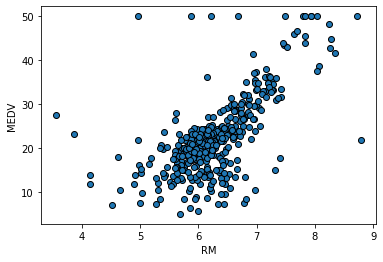

In [14]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [15]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [16]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [24]:
# Cria o modelo 
modelo = modelo_linear()

In [29]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Treinamento do Modelo

In [30]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [31]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [32]:
# Lista para as previsões
predictions_list = []

In [33]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [34]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [35]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [36]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 0s - loss: 603.5787 - mae: 22.9856 - mse: 603.5787WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000216A7185AF0> and will run it as-is.
Please report this to the TensorFlow team. When filing

In [37]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [38]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [39]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [40]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [41]:
df.head()

,MSE em Treino,MSE em Validação
0,615.008728,705.955811
1,608.208984,698.717102
2,601.333557,691.530945
3,594.620422,684.395264
4,587.772156,677.312378


<AxesSubplot:>

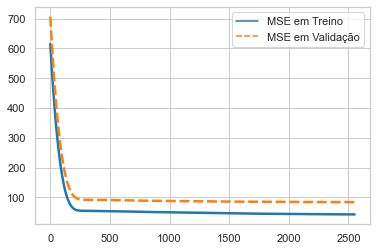

In [42]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [48]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

4/4 [==============================] - 0s 665us/step


In [47]:
# Imprime as previsões
previsoes

array([20.826635, 18.22946 , 23.97531 , 21.262705, 20.480345, 20.582949,
       24.616587, 21.884745, 20.993368, 20.78816 , 26.033812, 23.475111,
       21.217813, 22.737642, 23.295553, 21.57693 , 27.25865 , 23.39816 ,
       29.881475, 19.84548 , 20.339262, 20.935652, 19.075945, 20.826635,
       18.832258, 23.564894, 22.89155 , 13.91366 , 16.978968, 36.031334,
       21.448671, 18.056314, 19.896784, 22.821009, 32.119537, 24.411379,
       21.782137, 28.355234, 25.931208, 32.824944, 27.899927, 31.125555,
       32.68386 , 16.978968, 23.096758, 23.321207, 18.19098 , 23.609781,
       38.141136, 36.178825, 17.97936 , 35.531136, 31.64499 , 26.09794 ,
       23.705973, 22.821009, 26.322386, 28.162851, 24.841036, 24.437029,
       23.212187, 18.928453, 23.462286, 22.827421, 21.038256, 20.127642,
       21.179338, 22.16049 , 21.615404, 21.519213, 27.316366, 24.962877,
       10.335331, 13.618673, 16.889189, 23.39816 , 17.293196, 17.79339 ,
       23.436632, 21.4615  , 20.134054, 26.142828, 